In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import tensorflow as tf

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
type(iris)

sklearn.utils.Bunch

In [5]:
X = iris.data

In [7]:
y = iris.target

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# MLP

In [9]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=100, 
                                                      random_state=1, stratify=y)

In [11]:
model = tf.keras.Sequential()

In [12]:
#은닉층(은닉 유닛 개수 =16, 입력 유닛 = 4, 활성 함수 = 시그모이드(=로지스틱함수))
model.add(tf.keras.layers.Dense(16, input_shape=(4,), activation = 'sigmoid')) 

In [13]:
#출력층(출력 유닛 개수 =3, 활성 함수 = 소프트 맥스)
model.add(tf.keras.layers.Dense(3, activation = 'softmax')) 

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [16]:
(4+1)*16 #입력층에서 은닉틍으로 가는 가중치의 개수

80

In [17]:
(16+1)*3 #은닉층에서 출력층으로 가는 가중치 개수

51

In [19]:
#비용, 옵티마이저(최적화 알고리즘), 지표 설정
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',
             metrics=['accuracy'])

In [20]:
model.fit(X_train, y_train, epochs=10, batch_size=2)

Epoch 1/10
50/50 [==============================] - 2s 3ms/step - loss: 1.0687 - accuracy: 0.3900
Epoch 2/10
50/50 [==============================] - 0s 3ms/step - loss: 0.9949 - accuracy: 0.6500
Epoch 3/10
50/50 [==============================] - 0s 2ms/step - loss: 0.9393 - accuracy: 0.6500
Epoch 4/10
50/50 [==============================] - 0s 6ms/step - loss: 0.8877 - accuracy: 0.6900
Epoch 5/10
50/50 [==============================] - 0s 6ms/step - loss: 0.8462 - accuracy: 0.6800
Epoch 6/10
50/50 [==============================] - 0s 5ms/step - loss: 0.8044 - accuracy: 0.7200
Epoch 7/10
50/50 [==============================] - 0s 4ms/step - loss: 0.7739 - accuracy: 0.7900
Epoch 8/10
50/50 [==============================] - 0s 5ms/step - loss: 0.7405 - accuracy: 0.7400
Epoch 9/10
50/50 [==============================] - 0s 5ms/step - loss: 0.7150 - accuracy: 0.7700
Epoch 10/10
50/50 [==============================] - 0s 6ms/step - loss: 0.6894 - accuracy: 0.6800


In [23]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 2s 14ms/step - loss: 0.6859 - accuracy: 0.7800


[0.685942530632019, 0.7799999713897705]

In [24]:
#패션 MNist
(X_train,y_train), (X_test, y_test)= tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [25]:
X_train.shape

(60000, 28, 28)

In [26]:
import matplotlib.pyplot as plt

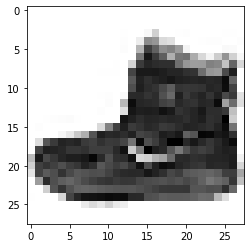

In [27]:
plt.imshow(X_train[0, :, :], cmap='Greys') #첫 번째 이미지를 28*28으로 가져오는 것

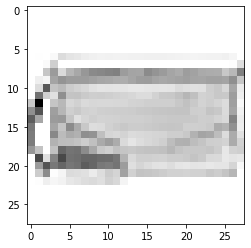

In [37]:
plt.imshow(X_train[1219, :, :], cmap='Greys')

In [38]:
y_train[0]

9

In [42]:
X_train = X_train / 255.0

In [43]:
X_test = X_test / 255.0